For a given dataset predict whether customer will exit (Output variable “Exited”)
the bank or not using artificial neural network


## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

In [2]:
dataset=pd.read_csv("Churn_Modelling (1).csv")

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data cleaning

In [7]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
dataset=dataset.drop(columns=['RowNumber','CustomerId','Surname'])

In [9]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
dataset.shape

(10000, 11)

<AxesSubplot:>

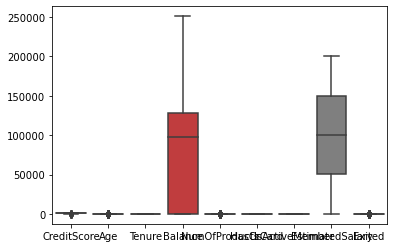

In [11]:
sns.boxplot(data=dataset)

In [12]:
x=dataset.iloc[:,:len(dataset.columns)-1]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [13]:
y=dataset.iloc[:,-1]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Data encoading

In [14]:
categorical_col=list(x.select_dtypes(include='object'))
categorical_col

['Geography', 'Gender']

In [15]:
x=pd.get_dummies(x,columns=categorical_col)

In [16]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


## Feature scalling

In [17]:
def standardScalling(x):
    x_mean=np.mean(x,axis=0)
    x_std=np.std(x,axis=0)
    x_scale=(x-x_mean)/x_std
    return x_scale

In [18]:
for i in range(len(x.columns)):
    x.iloc[:,i]=standardScalling(x.iloc[:,i].values)

In [19]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809,1.095988,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740,1.095988,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809,1.095988,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809,1.095988,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740,1.095988,-1.095988
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0.997204,-0.578736,-0.573809,-0.912419,0.912419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0.997204,-0.578736,-0.573809,-0.912419,0.912419
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,0.997204,-0.578736,-0.573809,1.095988,-1.095988
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,-1.002804,1.727904,-0.573809,-0.912419,0.912419


## Train test split

In [20]:
split_ratio=0.8
split_index=int(split_ratio*len(x))
x_train=x[:split_index].values
x_test=x[split_index:].values
y_train=y[:split_index].values
y_test=y[split_index:].values

In [21]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((8000, 13), (8000,), (2000, 13), (2000,))

## Building model for single layer neural network

In [22]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
y_train.shape,y_test.shape

((8000, 1), (2000, 1))

In [23]:
theta= np.random.randn(1,(len(x_train[1,:])+1))
theta.shape

(1, 14)

In [24]:
x1=np.ones((x_train.shape[0],1))
x_train=np.concatenate((x1,x_train),axis=1)
x_train.shape

(8000, 14)

In [25]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [26]:
def forward_propogation(x_train,theta):
    z=np.dot(x_train,theta.T)
    return sigmoid(z)

In [27]:
def gradient_descent(x_train,y_train,theta,alpha,epoch):
    cost_list=[]
    weight=[]
    correct_predict=[]
    for i in range(epoch):
        y_pred=forward_propogation(x_train,theta)
        theta=theta-alpha/(len(x_train))*np.sum((y_pred-y_train)*x_train,axis=0)
        weight.append(theta)
        y_train_predict=forward_propogation(x_train,theta)
        y_train_predict=np.where(y_train_predict>0.5,1,0)
        arr=(y_train==y_train_predict)
        correct_predict.append((i,arr.sum()))
    return y_train_predict,theta,correct_predict

In [28]:
epoch=5000
alpha=0.1
y_train_predict,theta,correct_predict=gradient_descent(x_train,y_train,theta,alpha,epoch)
print(theta)

[[-1.6618201  -0.05757273  0.79018381 -0.04260526  0.16787064 -0.05693905
  -0.01372898 -0.57332711  0.0349476  -0.29651536  0.06792158 -0.2524404
   0.86081438  0.57340443]]


In [29]:
y_train_predict

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [30]:
x1=np.ones((x_test.shape[0],1))
x_test=np.concatenate((x1,x_test),axis=1)
x_test.shape

(2000, 14)

In [31]:
z=np.dot(x_test,theta.T)
y_test_pred=1/(1+np.exp(-z))
y_test_pred=np.where(y_test_pred>0.5,1,0)
y_test_pred=np.array(y_test_pred,dtype='int64')

In [32]:
y_test_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

## Performance matrix

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve

In [44]:
confusion_matrix1=confusion_matrix(y_test,y_test_pred)
confusion_matrix1

array([[1530,   80],
       [ 306,   84]], dtype=int64)

In [34]:
acc=accuracy_score(y_test,y_test_pred)
acc

0.807

In [35]:
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(len(y_test)):
    if y_test[i] == 0:
        if y_test[i] == y_test_pred[i]:
            TP += 1
        else:
            FP += 1
    if y_test[i] == 1:
        if y_test[i] == y_test_pred[i]:
            TN += 1
        else:
            FN += 1

In [36]:
TP

1530

In [37]:
TN

84

In [38]:
FP

80

In [39]:
FN

306

In [40]:
precision=TP/(TP+FP)
precision

0.9503105590062112

In [41]:
recall=TP/(TP+FN)
recall

0.8333333333333334

In [42]:
F1_score=TP/(TP+1/2*(FP+FN))
F1_score

0.8879860708067324

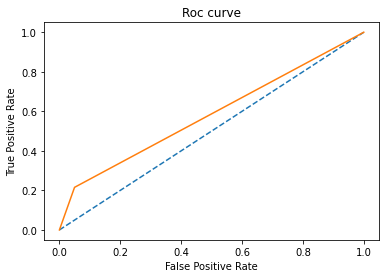

In [43]:
fpr,tpr,th=roc_curve(y_test,y_test_pred)
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc curve")
plt.show()